# Tensor Flow to encode LFW set
To learn how to encode a simple image and a GIF

## Import & Preparation
### Import needed for Tensorflow

In [1]:
import numpy as np
import tensorflow as tf

### Import needed for Jupiter

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image

In [3]:
### A function to save a picture

In [4]:
#need to be called within a session
def write_png(tensor, name):
    casted_to_uint8 = tf.cast(tensor, tf.uint8)
    converted_to_png = tf.image.encode_png(casted_to_uint8)
    f = open(name, "wb+")
    f.write(converted_to_png.eval())
    f.close() 

### Make the list of all files

In [5]:
import fnmatch, os
matches = []
for root, dirnames, filenames in os.walk('./lfw/'):
    print filenames
    for filename in fnmatch.filter(filenames, '*.jpg'):
        matches.append(os.path.join(root, filename))

size = len(matches)
print 'size=', size

['.DS_Store']
['Aaron_Eckhart_0001.jpg']
['Aaron_Guiel_0001.jpg']
['Aaron_Patterson_0001.jpg']
['Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol_0002.jpg', 'Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol_0004.jpg']
['Aaron_Pena_0001.jpg']
['Aaron_Sorkin_0001.jpg', 'Aaron_Sorkin_0002.jpg']
['Aaron_Tippin_0001.jpg']
['Abba_Eban_0001.jpg']
['Abbas_Kiarostami_0001.jpg']
['Abdel_Aziz_Al-Hakim_0001.jpg']
['Abdel_Madi_Shabneh_0001.jpg']
['Abdel_Nasser_Assidi_0001.jpg', 'Abdel_Nasser_Assidi_0002.jpg']
['Abdoulaye_Wade_0001.jpg', 'Abdoulaye_Wade_0002.jpg', 'Abdoulaye_Wade_0003.jpg', 'Abdoulaye_Wade_0004.jpg']
['Abdul_Majeed_Shobokshi_0001.jpg']
['Abdul_Rahman_0001.jpg']
['Abdulaziz_Kamilov_0001.jpg']
['Abdullah_0001.jpg', 'Abdullah_0002.jpg', 'Abdullah_0003.jpg', 'Abdullah_0004.jpg']
['Abdullah_Ahmad_Badawi_0001.jpg']
['Abdullah_al-Attiyah_0001.jpg', 'Abdullah_al-Attiyah_0002.jpg', 'Abdullah_al-Attiyah_0003.jpg']
['Abdullah_Gul_0001.jpg', 'Abdullah_Gul_0002.jpg', 'Abdullah_Gul_0003.jpg', 'Abdullah_Gul_0004.jp

### Prepare the session

In [6]:
tf.reset_default_graph()

filenames = tf.constant(matches)
filename_queue = tf.train.string_input_producer(filenames)
image_reader = tf.WholeFileReader()


accumul = tf.zeros([1,250,250])

# when using jupyter, creating a session this way is more convinient
sess =  tf.Session()

## Loading all pictures
### Load all images in a single tensor

In [7]:
size = 10 # comment this line for load all the pictures and not only the 10 first.

with sess.as_default():
    tf.initialize_all_variables().run()
    
    # For some reason, we need a coordinator and some threads
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    
    # Loop for all the image
    for i in range (0, size):
        # read and decode image, will give a uint8 with shape [250, 250, 1]
        filename, image_file = image_reader.read(filename_queue)     
        image = tf.image.decode_jpeg(image_file, channels=1)
        
        # remove channel dimension and add index dimension
        tensor_uint8 = tf.expand_dims(tf.squeeze(image, squeeze_dims=[2]),0)
        
        # convert to float32 and concat to all face
        tensor = tf.cast(tensor_uint8, tf.float32)
        accumul = tf.concat(0, [accumul, tensor])
        
        # print some log
        print(filename.eval(),tensor.eval().shape, accumul.eval().shape)

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)

('./lfw/Billy_Graham/Billy_Graham_0002.jpg', (1, 250, 250), (2, 250, 250))
('./lfw/Edwin_Edwards/Edwin_Edwards_0003.jpg', (1, 250, 250), (3, 250, 250))
('./lfw/Richard_Harris/Richard_Harris_0001.jpg', (1, 250, 250), (4, 250, 250))
('./lfw/James_Wolfensohn/James_Wolfensohn_0005.jpg', (1, 250, 250), (5, 250, 250))
('./lfw/John_Kerr/John_Kerr_0001.jpg', (1, 250, 250), (6, 250, 250))
('./lfw/Toutai_Kefu/Toutai_Kefu_0001.jpg', (1, 250, 250), (7, 250, 250))
('./lfw/Charlton_Heston/Charlton_Heston_0004.jpg', (1, 250, 250), (8, 250, 250))
('./lfw/Jack_Straw/Jack_Straw_0001.jpg', (1, 250, 250), (9, 250, 250))
('./lfw/Bashar_Assad/Bashar_Assad_0004.jpg', (1, 250, 250), (10, 250, 250))
('./lfw/Chuck_Woolery/Chuck_Woolery_0001.jpg', (1, 250, 250), (11, 250, 250))


In [8]:
with sess.as_default():
    all_grey_faces = tf.Variable(tf.gather(accumul, range(1, size+1)), name='all_grey_faces')
    
    # because we create a new variable, we need to initialize it again
    tf.initialize_all_variables().run()

In [9]:
with sess.as_default():
    a_face = tf.gather(all_grey_faces,[0])
    print a_face.eval().shape
    # remove channel dimension and add index dimension
    pict_face = tf.expand_dims(tf.squeeze(a_face, squeeze_dims=[0]),2)
    print pict_face.eval().shape
    write_png(pict_face, 'a_face.png')

(1, 250, 250)
(250, 250, 1)


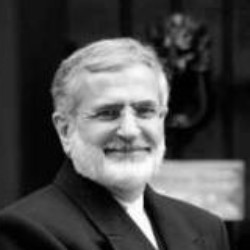

In [10]:
Image("a_face.png")

In [11]:
with sess.as_default():
    soft_face=tf.image.adjust_contrast(pict_face,-1)
    a_contrasted_face = tf.image.per_image_whitening(soft_face)
    write_png(a_contrasted_face, 'bw_face.png')

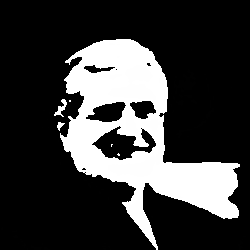

In [12]:
Image("bw_face.png")

### Create a variable that contains all faces

In [13]:
with sess.as_default():
    soft_faces=tf.image.adjust_contrast(all_grey_faces,-1)
    contrasted_faces = tf.image.per_image_whitening(soft_faces)
    all_faces = tf.Variable(contrasted_faces, name='all_faces')
    
    # because we create a new variable, we need to initialize it again
    tf.initialize_all_variables().run()
    
    print all_faces.eval().shape

(10, 250, 250)


### Check variable

In [14]:
with sess.as_default():
    for var in tf.all_variables():
        print (var.name, var.eval().shape)
        
    print all_faces.eval().shape
    print all_faces.eval()

(u'all_grey_faces:0', (10, 250, 250))
(u'all_faces:0', (10, 250, 250))
(10, 250, 250)
[[[ 0.14536607  0.15289439  0.14419065 ...,  0.92481071  0.95753837
    0.95830441]
  [ 0.14536607  0.15289439  0.14419065 ...,  0.90830153  0.95753837
    0.95830441]
  [ 0.14536607  0.15289439  0.14419065 ...,  0.89179236  0.94102919
    0.94179523]
  ..., 
  [ 0.44253123  0.45005956  0.44135582 ...,  1.15593922  1.17215765
    1.17292368]
  [ 0.47554958  0.46656874  0.457865   ...,  1.15593922  1.17215765
    1.17292368]
  [ 0.47554958  0.46656874  0.47437418 ...,  1.15593922  1.17215765
    1.17292368]]

 [[ 0.73969638  0.74722475  0.75503016 ...,  1.18895757  1.205176
    1.20594203]
  [ 0.73969638  0.74722475  0.75503016 ...,  1.18895757  1.205176
    1.20594203]
  [ 0.73969638  0.74722475  0.75503016 ...,  1.1724484   1.18866682
    1.18943286]
  ..., 
  [ 0.3930037   0.35100451  0.24324571 ..., -2.11287761 -2.12967753
   -2.14542055]
  [ 0.37649453  0.11987605  0.21022736 ..., -2.2119329  -2.2

## Saving the variable to disk
### Save all faces

In [15]:
with sess.as_default():   
    # Save the variables to disk.
    saver = tf.train.Saver([all_faces])
    save_path = saver.save(sess, "./tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

Model saved in file: ./tmp/model.ckpt


## Close the session

In [16]:
sess.close()

Feedback wellcome @dh7net